In [17]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble, decomposition
import random
from IPython.display import Image
%matplotlib inline
!pwd

/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning


###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary


In [39]:
# 1 & 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, ensemble, decomposition
import random
%matplotlib inline
import pandas as pd

try:
    del merged_data
except:
    pass
individual_files = ['AAA','BAA','CPILFESL','GDPC1','GS1','GS10','INDPRO','UNRATE']
for ifile in individual_files:
    one_data_file = open(r'/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning/data/economics/' + ifile +'.csv','r')
    df = pd.read_csv(one_data_file)
    df.rename(columns = {'VALUE':ifile}, inplace=True)
    try:
        merged_data = pd.merge(merged_data,df,how='outer', on="DATE")
    except:
        merged_data = df
    one_data_file.close()
merged_data.set_index('DATE', inplace=True)
merged_data.head(10)

,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
DATE,,,,,,,,
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN
1919-06-01,5.40,7.04,NaN,NaN,NaN,NaN,4.9119,NaN
1919-07-01,5.44,7.06,NaN,NaN,NaN,NaN,5.2071,NaN
1919-08-01,5.56,7.13,NaN,NaN,NaN,NaN,5.2876,NaN
1919-09-01,5.60,7.27,NaN,NaN,NaN,NaN,5.1803,NaN


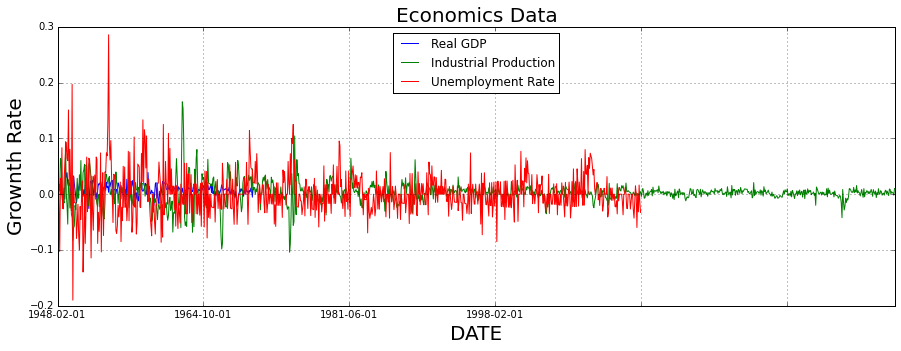

In [10]:
#result = left.join(right, how='outer')
term_premium = pd.Series(merged_data['GS10'] - merged_data['GS1'], name = 'termpremium')
default_premium = pd.Series(merged_data['BAA'] - merged_data['AAA'], name = 'defaultpremium')

premiumstuff = pd.concat([term_premium, default_premium], axis=1)
premiumstuff

GDPC1=merged_data['GDPC1'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph
INDPRO=merged_data['INDPRO'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph
UNRATE=merged_data['UNRATE'].dropna().pct_change().dropna() # pct_change introduces a nan so do dropna again to get better graph

#GDPC1[~GDPC1.isnull()]

#INDPRO[~INDPRO.isnull()]

#UNRATE[~UNRATE.isnull()]

f=plt.figure(figsize=(15,5))
GDPC1.plot()
INDPRO.plot()
UNRATE.plot()
plt.legend( ('Real GDP', 'Industrial Production', 'Unemployment Rate'), loc='upper center')
plt.title('Economics Data', fontsize = 20)
plt.xlabel('DATE', fontsize = 20)
plt.ylabel('Grownth Rate', fontsize = 20)
plt.grid()

**Drawn Inferences**
There is a correlation between unemployment and industrial production as far as being volatile at the same time. There are other factors that are causing the violility most likely as the correlation is low.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f17c050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1103eef10>]], dtype=object)

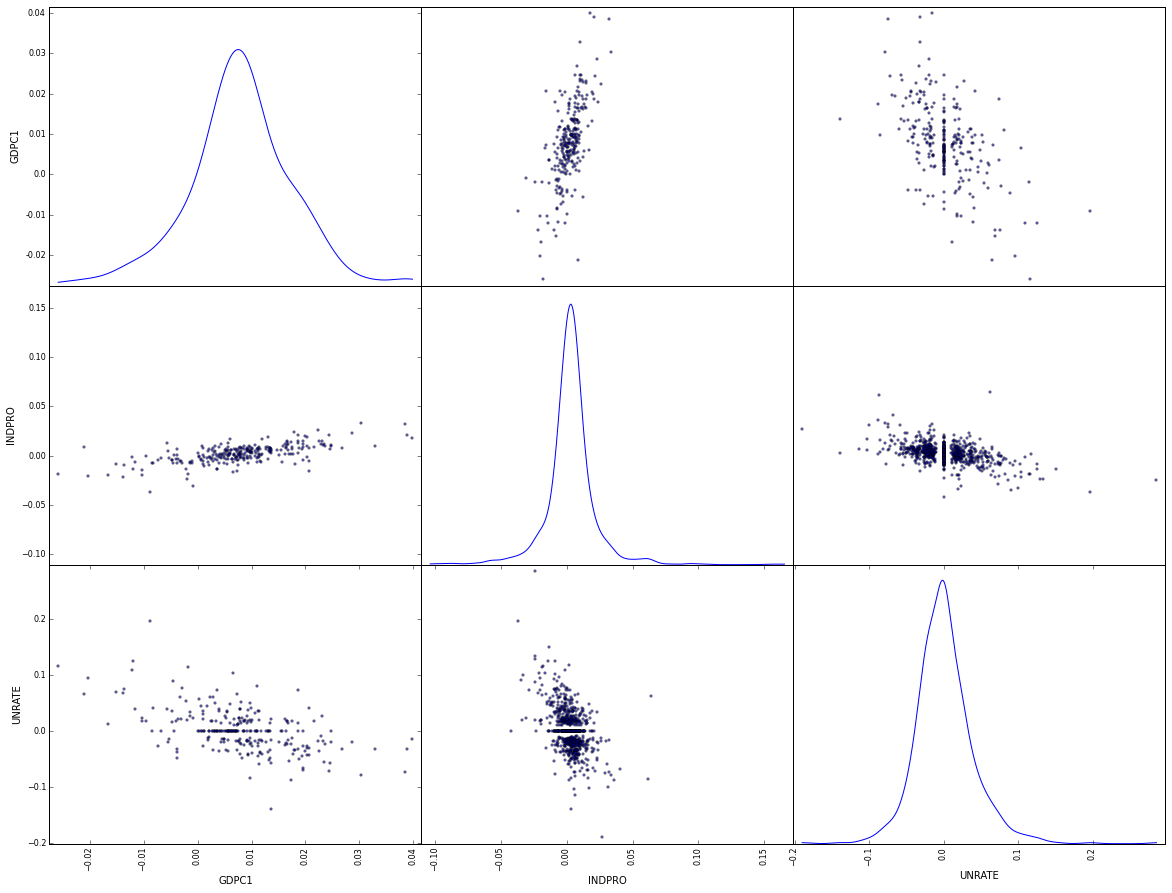

In [16]:
graphdata=pd.concat([GDPC1, INDPRO, UNRATE],axis=1).reset_index()
scatter_matrix(graphdata, figsize=(20,15), diagonal='kde')

In [14]:
!pwd

/Users/mgalarny/Desktop/mgalarny/DSE200/day_3_models_and_learning


**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

####Creating Meta_Data

In [15]:
!wget https://github.com/pydata/pydata-book/blob/master/ch07/foods-2011-10-03.json

--2015-11-12 04:34:42--  https://github.com/pydata/pydata-book/blob/master/ch07/foods-2011-10-03.json?raw=true
Resolving github.com (github.com)... 192.30.252.130
Connecting to github.com (github.com)|192.30.252.130|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pydata/pydata-book/raw/master/ch07/foods-2011-10-03.json [following]
--2015-11-12 04:34:43--  https://github.com/pydata/pydata-book/raw/master/ch07/foods-2011-10-03.json
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pydata/pydata-book/master/ch07/foods-2011-10-03.json [following]
--2015-11-12 04:34:43--  https://raw.githubusercontent.com/pydata/pydata-book/master/ch07/foods-2011-10-03.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.27.79.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.27.79.133|:443... connected.
HTTP request sen

In [35]:
import json
largefile = json.load(open('foods-2011-10-03.json'))


try:
    del merged_Dict
except:
    pass

for index, dictionary in enumerate(largefile):
    
    initialdict=pd.DataFrame({'#':[0]})
    initialdict['description']=dictionary['description']
    initialdict['group']=dictionary['group']
    initialdict['id']=dictionary['id']
    initialdict['manufacturer']=dictionary['manufacturer']
    del initialdict['#']
    try:
        
        merged_Dict=pd.merge(meta_data,initialdict, how='outer')
    except:
      
        merged_Dict=initialdict
        
#Setting id as index
merged_Dict.set_index('id', inplace=True)

#Removing duplicates
merged_Dict.drop_duplicates()

merged_Dict.index.name='id'
merged_Dict.head()

,description,group,manufacturer
id,,,
NaN,"Cheese, caraway",Dairy and Egg Products,
NaN,"Cheese, cheddar",Dairy and Egg Products,
NaN,"Cheese, edam",Dairy and Egg Products,
NaN,"Cheese, feta",Dairy and Egg Products,
NaN,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


In [36]:

food=pd.DataFrame(largefile)
food.set_index('id', inplace=True)
for index in food.index.values:
    for nutri in food['nutrients'][index]:
        #Add the food id to each nutrient dictionary
        nutri['id']=index


In [22]:
dict_list=[]
for index, i in enumerate(food.index.values):
    print str(index)+' of '+str(len(food.index.values)),'\r',
    for nutri in food['nutrients'][i]:
        dict_list.append(nutri)
print dict_list[0:10]

num=[]
description=[]
group=[]
i=[]
units=[]
value=[]
for index, dictionary in enumerate(dict_list):
    print str(index)+' of '+str(len(dict_list)),'\r',
    description.append(dictionary['description'])
    group.append(dictionary['group'])
    i.append(str(dictionary['id']))  #Convert to str to avoid math operations on id
    units.append(dictionary['units'])
    value.append(dictionary['value'])
print 'List of attributes ready!\n'
print 'First 10 elements of sample attribute, id:\n'
print i[0:10]

nutrients={}
nutrients['description']=description
nutrients['group']=group
nutrients['id']=i
nutrients['units']=units
nutrients['value']=value

nutrients=pd.DataFrame(nutrients)
print '\nData Frame of nutrients data:\n'
nutrients.head()

max_nut=nutrients.groupby(['description']).max()
print '\nFinal Data Frame with max value of each nutrient:\n'
max_nut.head()

[{u'units': u'g', u'group': u'Composition', u'description': u'Protein', u'value': 25.18, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Total lipid (fat)', u'value': 29.2, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Carbohydrate, by difference', u'value': 3.06, 'id': 1008}, {u'units': u'g', u'group': u'Other', u'description': u'Ash', u'value': 3.28, 'id': 1008}, {u'units': u'kcal', u'group': u'Energy', u'description': u'Energy', u'value': 376.0, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Water', u'value': 39.28, 'id': 1008}, {u'units': u'kJ', u'group': u'Energy', u'description': u'Energy', u'value': 1573.0, 'id': 1008}, {u'units': u'g', u'group': u'Composition', u'description': u'Fiber, total dietary', u'value': 0.0, 'id': 1008}, {u'units': u'mg', u'group': u'Elements', u'description': u'Calcium, Ca', u'value': 673.0, 'id': 1008}, {u'units': u'mg', u'group': u'Elements', u'description': u'Iron, Fe',

,group,id,units,value
description,,,,
Adjusted Protein,Composition,19078,g,12.900
Alanine,Amino Acids,9445,g,8.009
"Alcohol, ethyl",Other,9444,g,42.500
Arginine,Amino Acids,9445,g,7.436
Ash,Other,9451,g,72.500


#2 function that accepts a nutrient name and a quantile value

In [33]:
def nutri_box(nutrient, quantile):
    df=nutrients[nutrients['description']==str(nutrient)]
    #return df
    df=df.groupby(['group']).quantile(q=quantile)
    df.plot(kind='barh')
    plt.title(nutrient+' (quantile = '+str(quantile)+')')

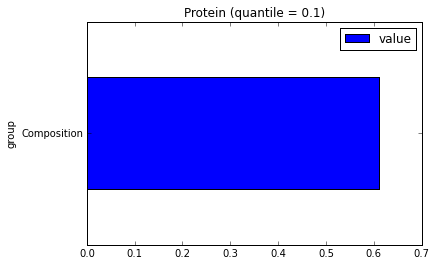

In [38]:
done=nutrients['description'].unique()
nutri_box(done[0],0.1)

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [36]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
digits = load_digits()
from sklearn import datasets
from sklearn import svm 
from sklearn.svm import SVC


In [15]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result



        1. max_depth: 
        2. max_features:
        3. n_estimators:



Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



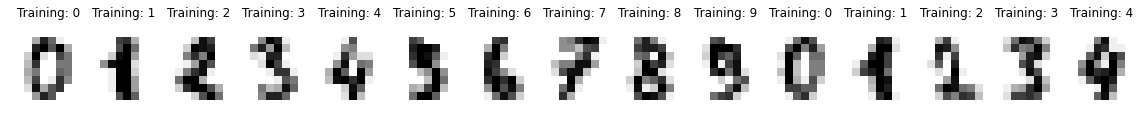

In [18]:
#1. 
#https://raw.githubusercontent.com/carpedm20/Study-of-Computer-Vision/master/notebooks/2_digit_recognition_example.ipynb
#images_and_labels = list(zip(digits.images, digits.target))
#http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn

images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(images_and_labels[:15]):
    plt.subplot(1, 15, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i\n' % label)

In [50]:
idx = len(digits.data)
half = idx/2
y = digits.target[:-half]
x = digits.data[:-half]
#clf = svm.SVC(gamma = 0.001, C = 100).fit(x,y).score(x,y)
#print clf
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0)
svc = SVC(kernel='rbf', C = 10000, gamma  = 0.0001).fit(X_train, y_train)
train_score = svc.score(X_train, y_train) 
train_score
test_score = svc.score(X_test, y_test)
print "rbf performance was:"
print test_score

svc = SVC(kernel='linear', C = 10000, gamma  = 0.0001).fit(X_train, y_train)
train_score = svc.score(X_train, y_train) 
train_score
test_score = svc.score(X_test, y_test)
print "linear performance was:"
print test_score

svc = SVC(kernel='poly', C = 10000, gamma  = 0.0001).fit(X_train, y_train)
train_score = svc.score(X_train, y_train) 
train_score
test_score = svc.score(X_test, y_test)
print "poly performance was:"
print test_score

svc = SVC(kernel='sigmoid', C = 10000, gamma  = 0.0001).fit(X_train, y_train)
train_score = svc.score(X_train, y_train) 
train_score
test_score = svc.score(X_test, y_test)
print "sigmoid performance was:"
print test_score

rbf performance was:
0.977777777778
linear performance was:
0.968888888889
poly performance was:
0.977777777778
sigmoid performance was:
0.96


** #3 The Choice of Kernel does not significantly effect the results. rbf and poly would be the best options as they consistently produce the best. ** 

###Dimensionality Reduction - PCA

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data.
Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). Use the sklearn inbuilt tool sklearn.decomposition.PCA
Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components
Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA as well (this extended analysis need not be submitted as part of homework)

<span style="color:red">Waiting for somebody to write a script that will do that automatically from python i.e write a script in python return the google maps url when passed with the latitude and longitudinal values of the place</span>


In [2]:
# 1.
def Q1GoogleMapsUrl(lon, lat):
    maps='https://www.google.com/maps/@'
    url = maps + lat + ',' + lon + ',17z'
    return url

lat='-2.163106'
lon='-55.126648'
Q1GoogleMapsUrl(lon,lat)

'https://www.google.com/maps/@-2.163106,-55.126648,17z'

#2.
<span style="color:red">Can you create a map where the denity of points is represented as a density map (topographical map)?</span>

See the Density map below and the ipython notebook 02_WeatherAnalysisTurnin.ipynb

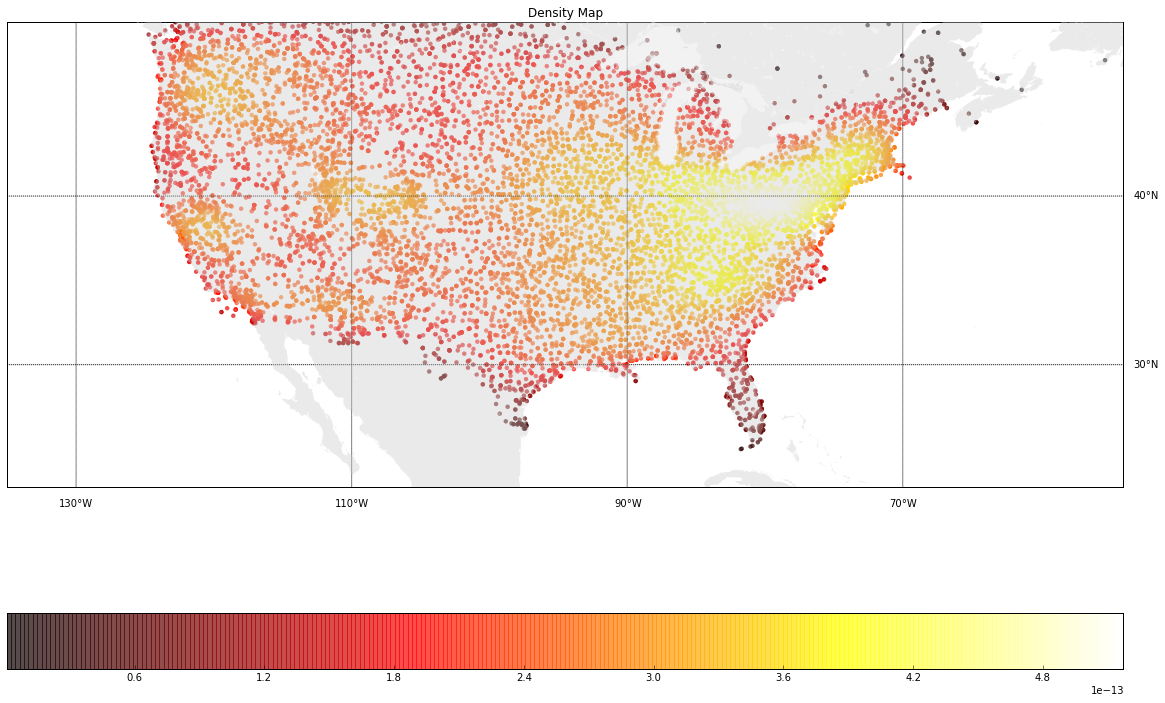

In [51]:
from IPython.display import Image
Image(filename='Density Map.png')

#3. 
<span style="color:red">Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?</span>
From the graphs below, we can see that it gets colder up north and in the colorado rocky area. More specifically at higher elevation. 

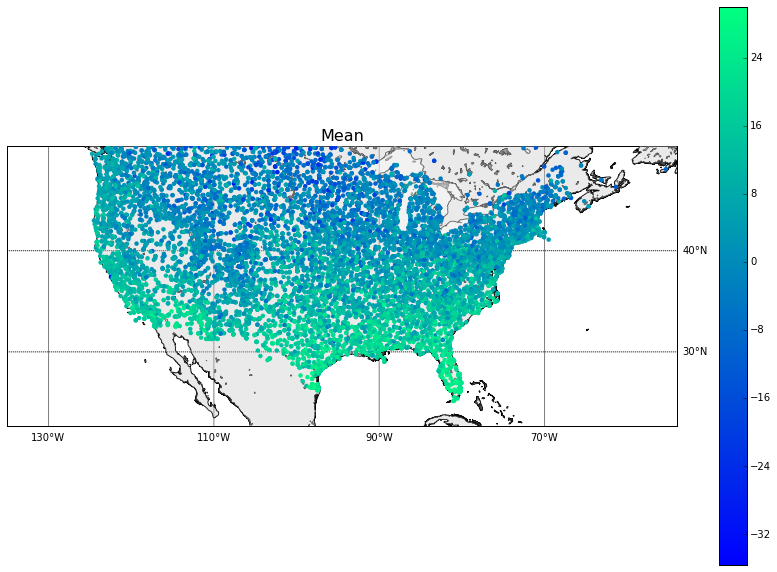

In [3]:
from IPython.display import Image
Image(filename='colder .png') 

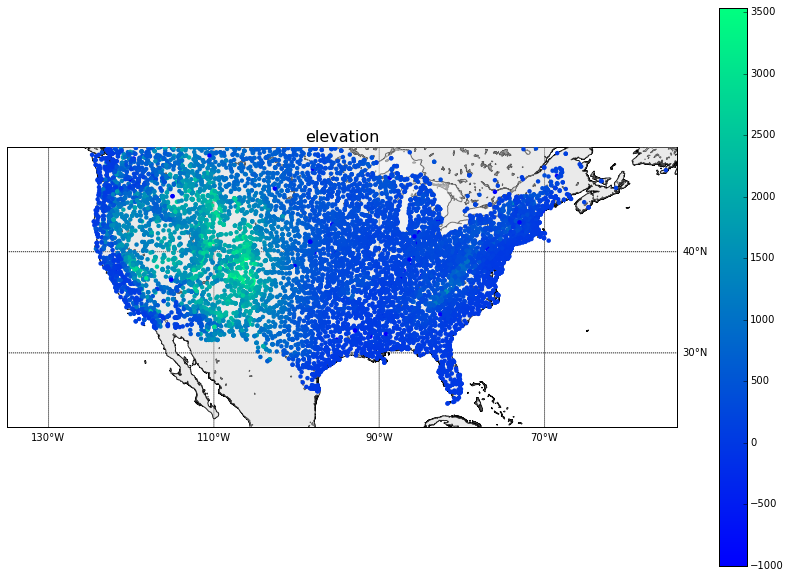

In [4]:
Image(filename='elevation.png')